# INN Rates Data Inspection

This notebook helps inspect the processed INN rates data stored in Parquet files.

In [1]:
import pandas as pd
import pyarrow.parquet as pq
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization style
plt.style.use('seaborn')
sns.set(rc={'figure.figsize':(12,8)})

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

## Load and Inspect Data

In [5]:
# Path to the processed rates
rates_dir = Path(r"C:\Users\ChristopherCato\OneDrive - clarity-dx.com\transparency_data\prod\scripts\data\processed\inn_rates")

# List all parquet files
parquet_files = list(rates_dir.glob("*.parquet"))
print(f"Found {len(parquet_files)} parquet files:")
for file in parquet_files:
    print(f"- {file.name}")

Found 2 parquet files:
- 2025-04_020_02I0_in-network-rates_1_of_2.json.parquet
- 2025-04_020_02I0_in-network-rates_2_of_2.json.parquet


In [6]:
# Load a specific parquet file
file_to_load = parquet_files[0]  # Change index to load different files
print(f"Loading {file_to_load.name}")

# Read into pandas DataFrame
df = pd.read_parquet(file_to_load)
print(f"\nShape: {df.shape}")
print("\nFirst few rows:")
df.head()

Loading 2025-04_020_02I0_in-network-rates_1_of_2.json.parquet

Shape: (35355, 5)

First few rows:


,cpt,npi,tin,pos,negotiated_rate
0,20610,1003110263,27-4398302,unknown,276.53
1,20610,1003867326,71-0548518,unknown,276.53
2,20610,1003901802,71-0312652,unknown,276.53
3,20610,1013490986,82-5161777,unknown,276.53
4,20610,1013906866,71-0862133,unknown,276.53


## Basic Statistics

In [7]:
# Summary statistics
print("Summary Statistics:")
df.describe()

Summary Statistics:


,npi,negotiated_rate
count,3.535500e+04,35355.000000
mean,1.500173e+09,40.176627
std,2.863252e+08,38.155910
min,1.003015e+09,0.000000
25%,1.255413e+09,0.000000
50%,1.508048e+09,37.130000
75%,1.740477e+09,67.100000
max,1.992994e+09,395.440000


In [8]:
# Count of unique values
print("Unique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

Unique values per column:
cpt: 3
npi: 3690
tin: 3590
pos: 1
negotiated_rate: 24


## Visualizations

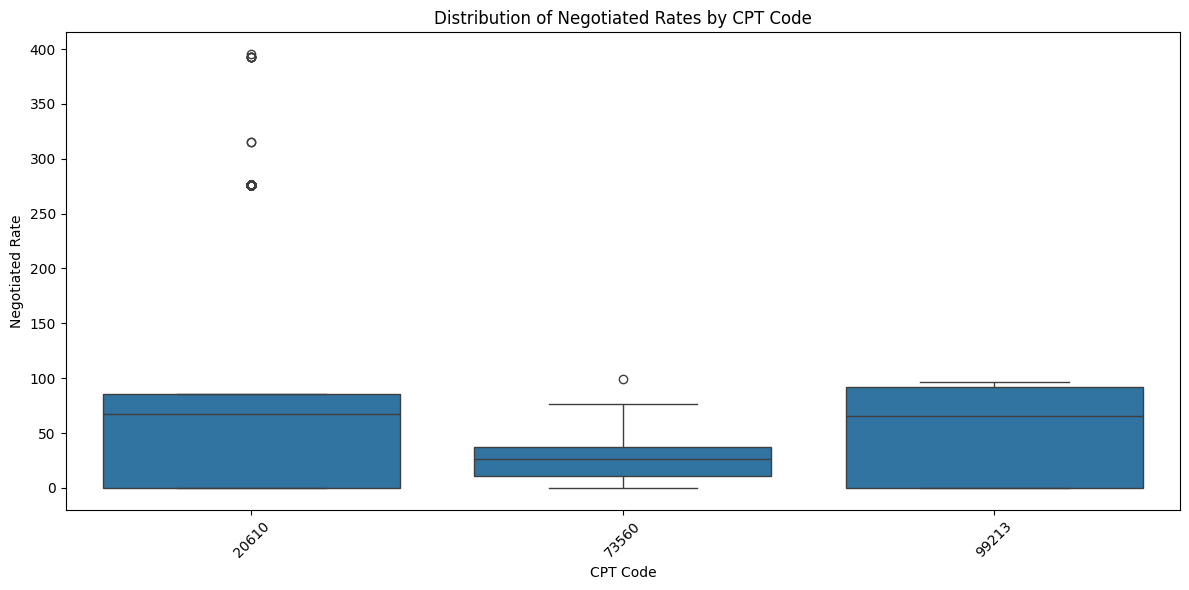

In [9]:
# Distribution of negotiated rates by CPT code
plt.figure(figsize=(12, 6))
sns.boxplot(x='cpt', y='negotiated_rate', data=df)
plt.title('Distribution of Negotiated Rates by CPT Code')
plt.xlabel('CPT Code')
plt.ylabel('Negotiated Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

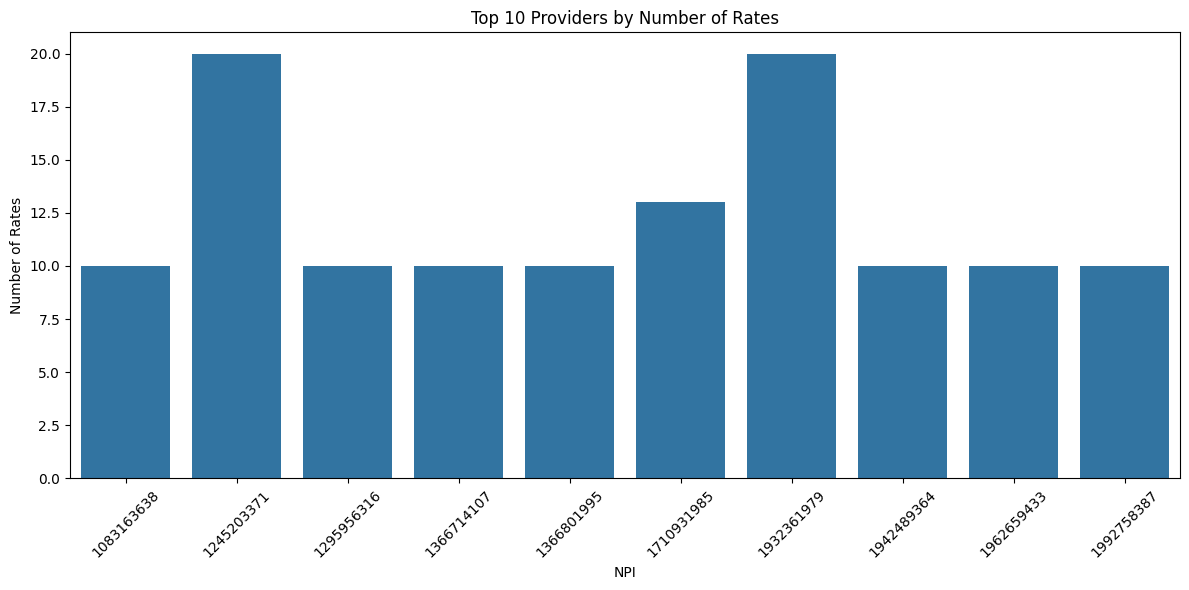

In [10]:
# Top providers by number of rates
top_providers = df['npi'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_providers.index, y=top_providers.values)
plt.title('Top 10 Providers by Number of Rates')
plt.xlabel('NPI')
plt.ylabel('Number of Rates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Data Quality Checks

In [11]:
# Check for missing values
print("Missing values per column:")
df.isnull().sum()

Missing values per column:


cpt                0
npi                0
tin                0
pos                0
negotiated_rate    0
dtype: int64

In [12]:
# Check for zero or negative rates
zero_rates = df[df['negotiated_rate'] <= 0]
print(f"Number of zero or negative rates: {len(zero_rates)}")
if len(zero_rates) > 0:
    print("\nSample of zero/negative rates:")
    zero_rates.head()

Number of zero or negative rates: 10426

Sample of zero/negative rates:


## Advanced Analysis

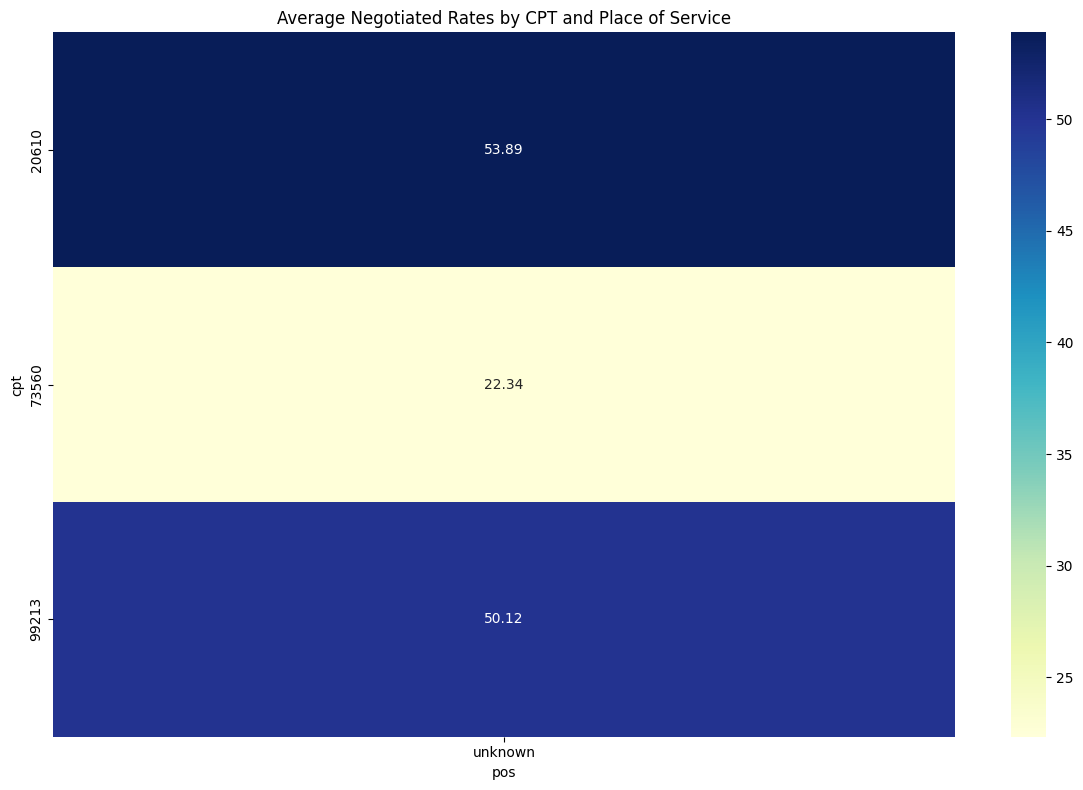

In [13]:
# Average rate by CPT and place of service
avg_rates = df.groupby(['cpt', 'pos'])['negotiated_rate'].mean().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(avg_rates, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Average Negotiated Rates by CPT and Place of Service')
plt.tight_layout()
plt.show()

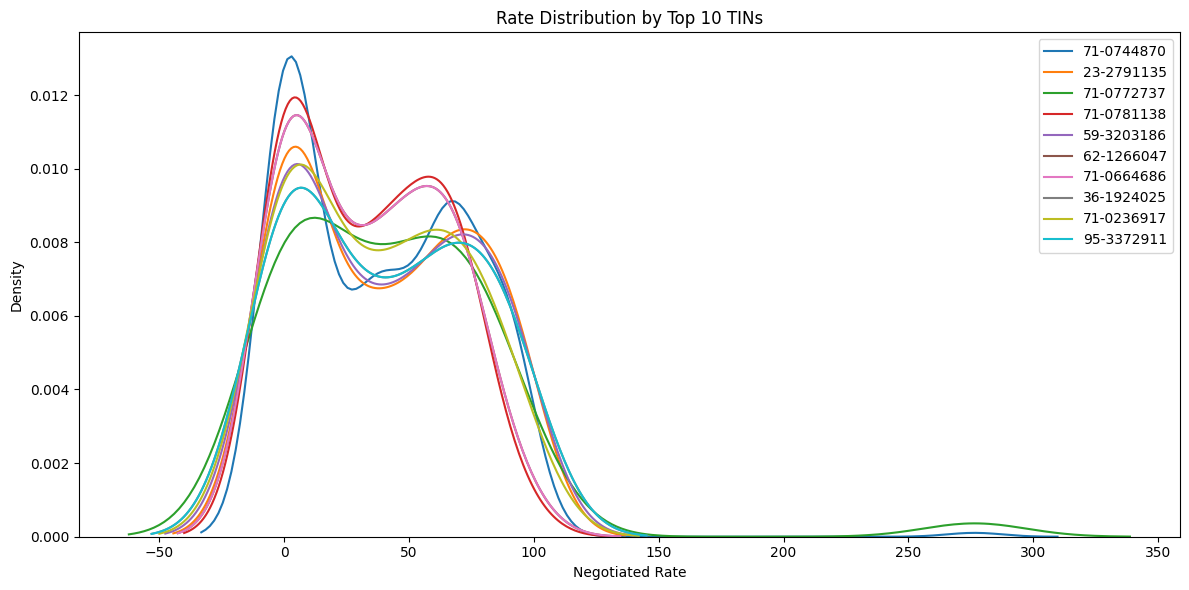

In [14]:
# Rate distribution by TIN
top_tins = df['tin'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
for tin in top_tins:
    sns.kdeplot(data=df[df['tin'] == tin], x='negotiated_rate', label=tin)
plt.title('Rate Distribution by Top 10 TINs')
plt.xlabel('Negotiated Rate')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()